###Importing the libraries

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

###Importing the dataset

In [27]:
dataset  = pd.read_csv('heart_failure.csv')
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [28]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [29]:
x

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 1.000e+00, 0.000e+00,
        4.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 1.000e+00, 0.000e+00,
        6.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 1.000e+00,
        7.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 0.000e+00,
        2.780e+02],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 1.000e+00,
        2.800e+02],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 1.000e+00,
        2.850e+02]])

In [30]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

###Checking missing values

In [31]:
print(pd.isnull(dataset).sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


###Splitting the data into train and test

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

###Feature scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

###Model training

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

###Model prediction

In [35]:
y_pred = classifier.predict(x_test)

###Comparing results train vs test

In [36]:
results = np.concatenate((y_test.reshape(len(y_test),1), y_pred.reshape(len(y_pred),1)), 1)
results

array([[0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1]])

###Data visualization

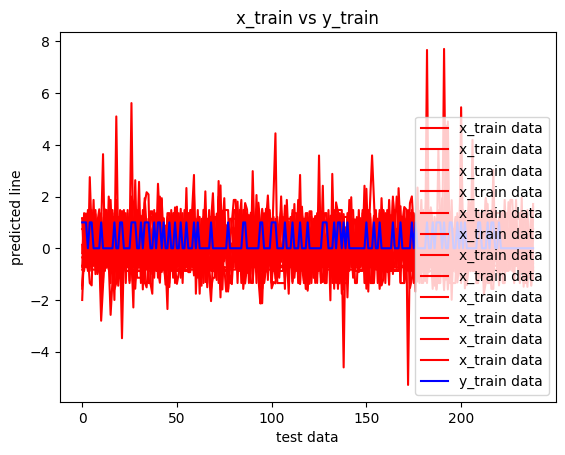

In [37]:
plt.title('x_train vs y_train')
plt.plot(range(len(x_train)), x_train, color='red', label='x_train data')
plt.plot(range(len(y_train)), y_train, color='blue', label='y_train data')
plt.xlabel('test data')
plt.ylabel('predicted line')
plt.legend()
plt.show()

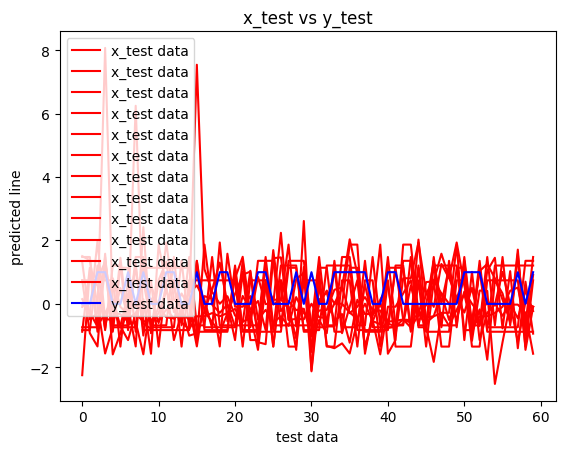

In [38]:
plt.title('x_test vs y_test')
plt.plot(range(len(x_test)), x_test, color='red', label='x_test data')
plt.plot(range(len(y_test)), y_test, color='blue', label='y_test data')
plt.xlabel('test data')
plt.ylabel('predicted line')
plt.legend()
plt.show()

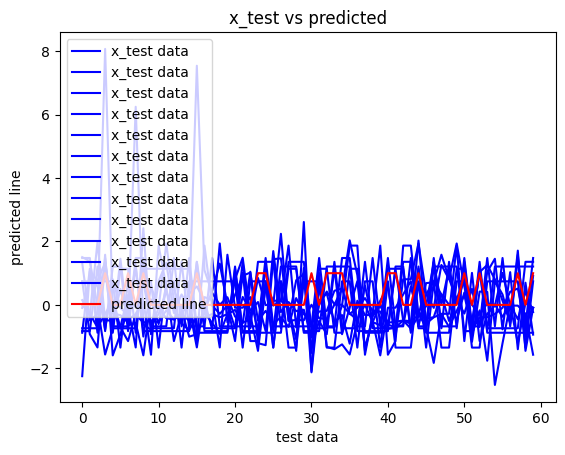

In [39]:
plt.title('x_test vs predicted')
plt.plot(range(len(x_test)), x_test, color='blue', label='x_test data')
plt.plot(range(len(y_pred)), y_pred, color='red', label='predicted line')
plt.xlabel('test data')
plt.ylabel('predicted line')
plt.legend()
plt.show()

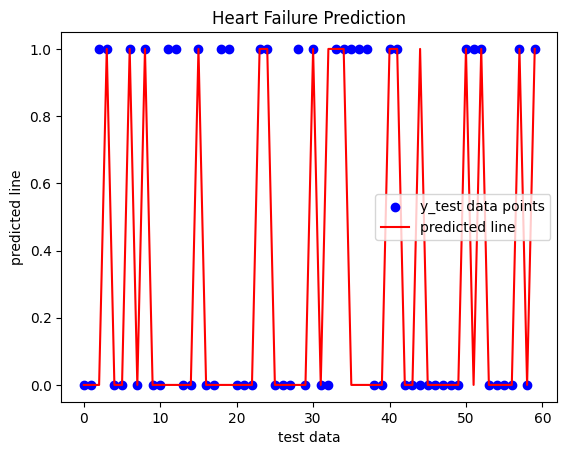

In [40]:
plt.title('Heart Failure Prediction')
plt.scatter(range(len(y_test)), y_test, color='blue', label='y_test data points')
plt.plot(range(len(y_pred)), y_pred, color='red', label='predicted line')
plt.xlabel('test data')
plt.ylabel('predicted line')
plt.legend()
plt.show()

###Confusion matrix

<Axes: >

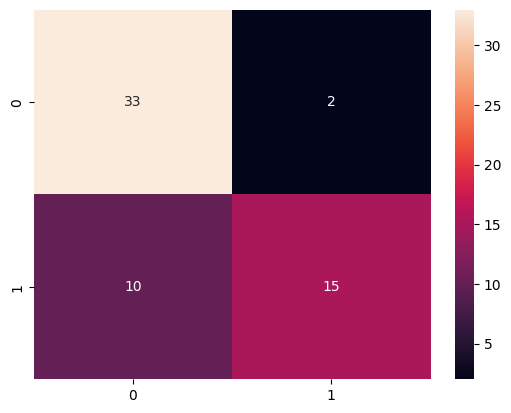

In [41]:
from sklearn.metrics import confusion_matrix
cm  = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

###Accuracy

In [42]:
from sklearn.metrics import accuracy_score
accuracy = round(accuracy_score(y_test, y_pred), 2)
print(f"The accuracy of the model is: {accuracy * 100}%")

The accuracy of the model is: 80.0%


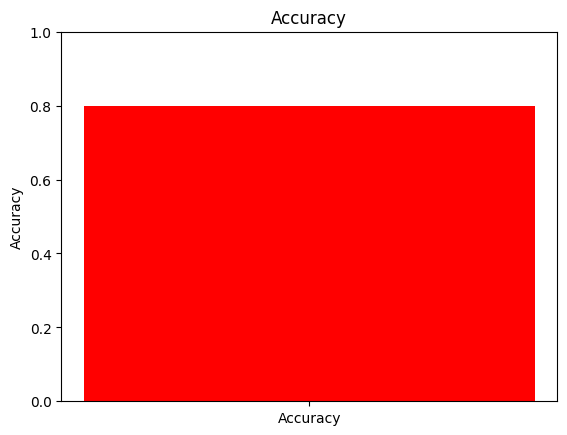

In [43]:
plt.title('Accuracy')
plt.bar("Accuracy", accuracy, color='red')
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()